# K Nearest Neigbors (KNN) - Classification

In [157]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
try:
    sns.set_theme()  # Use seaborn themes with matplotlib (newer versions)
except AttributeError:  # Fallback for older seaborn versions
    sns.set()

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn for KNN Classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [158]:
rand_state = 1000

In [159]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [161]:
def clean_column_header(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

# calling the function
df = clean_column_header(df)

In [162]:
df

,user_id,gender,age,estimatedsalary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


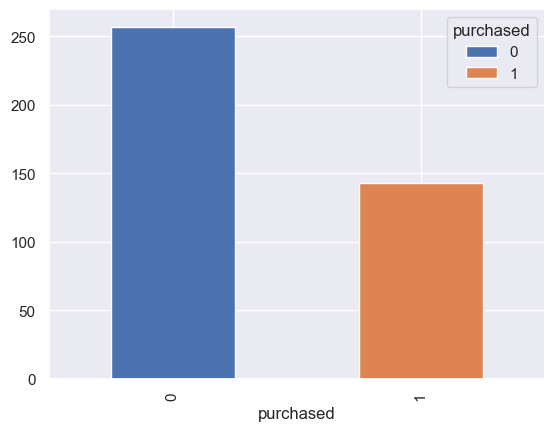

In [163]:
# check the data proportion 
pd.crosstab(df['purchased'], df['purchased']).plot(kind='bar', stacked=True)
plt.show()

In [164]:
pd.crosstab(df['purchased'], df['purchased'], normalize=True)*100

purchased,0,1
purchased,,
0,64.25,0.00
1,0.00,35.75


In [165]:
# drop the user Id 
df.drop(columns=['user_id'], inplace=True)

In [166]:
df

,gender,age,estimatedsalary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [167]:
# Convert the dummy data using the get_dummy 
df = pd.get_dummies(df, dtype='int64', drop_first=True)

In [168]:
df

,age,estimatedsalary,purchased,gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [169]:
df.columns.to_list()

['age', 'estimatedsalary', 'purchased', 'gender_Male']

In [170]:
df.rename(columns =({'gender_Female': 'female', 'gender_Male': 'male'}), inplace=True)

In [171]:
df

,age,estimatedsalary,purchased,male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [172]:
df.describe()

,age,estimatedsalary,purchased,male
count,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.490000
std,10.482877,34096.960282,0.479864,0.500526
min,18.000000,15000.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000


In [173]:
df.corr

<bound method DataFrame.corr of      age  estimatedsalary  purchased  male
0     19            19000          0     1
1     35            20000          0     1
2     26            43000          0     0
3     27            57000          0     0
4     19            76000          0     1
..   ...              ...        ...   ...
395   46            41000          1     0
396   51            23000          1     1
397   50            20000          1     0
398   36            33000          0     1
399   49            36000          1     0

[400 rows x 4 columns]>

<Axes: >

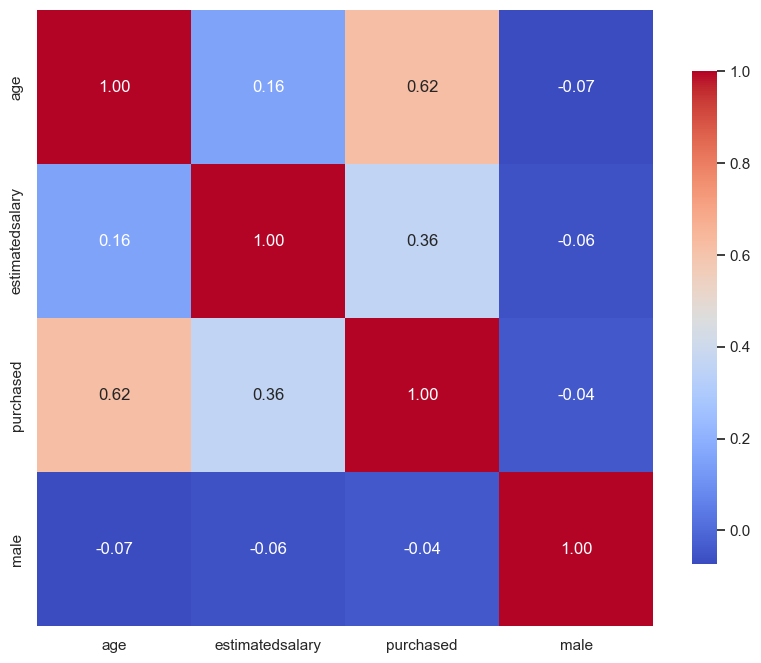

In [174]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [175]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = scaler.fit_transform(df[['age', 'estimatedsalary']])

In [176]:
df_sc = pd.DataFrame(data=df_sc, columns=['age', 'estimatedsalary'])
df_sc.head()

,age,estimatedsalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [177]:
# combined the data
df_sc = pd.concat([df_sc, df[['age']].rename(columns={'age': 'age_from_df'})], axis=1)

In [178]:
df

,age,estimatedsalary,purchased,male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [181]:
df

,age,estimatedsalary,purchased,male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1
